In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import string
import numpy as np

In [2]:
CLONE_CLASSES = ['__background__', 'holoclone', 'meroclone', 'paraclone']

In [3]:
df_dt = pd.read_csv('./test_res.csv')
df_dt['bbox_idx_dt'] = df_dt.index
df_dt['label_dt'] = df_dt['label_dt'].map(lambda x: CLONE_CLASSES[x])

In [4]:
df_dt = df_dt[df_dt['scores']>0.95]

In [5]:
df_gt = pd.read_csv('../data/test_day6.csv')
df_gt['x1_gt'] = df_gt['x1']
df_gt['y1_gt'] = df_gt['y1']
df_gt['x2_gt'] = df_gt['x2']
df_gt['y2_gt'] = df_gt['y2']
df_gt['label_gt'] = df_gt['label'].map(lambda x: x.strip(string.digits))
df_gt['bbox_idx_gt'] = df_gt.index
# size = df_gt['size'].tolist()[0]

In [6]:
# df_dt['x1_dt'] = (df_dt['x1_dt'] * (size / df_dt['resize']))
# df_dt['y1_dt'] = (df_dt['y1_dt'] * (size / df_dt['resize']))
# df_dt['x2_dt'] = (df_dt['x2_dt'] * (size / df_dt['resize']))
# df_dt['y2_dt'] = (df_dt['y2_dt'] * (size / df_dt['resize']))

In [7]:
# from data.utils import calc_mAP, get_df_iou
# calc_mAP(df_dt, df_gt)

(150, 537, 830, 0.21834061135053362)

In [8]:
# df_dt

In [9]:
# df_gt

In [22]:
image_id = df_gt.sample(1)['image_id'].tolist()[0]
df_gt_sample = df_gt[df_gt['image_id']==image_id]
df_gt_sample

day        label  size  width  height                filename  \
942    6   meroclone4  1344     89      83  1635560459_6580758.png   
943    6  paraclone17  1344     81      96  1635560459_6580758.png   
944    6  paraclone18  1344     56      46  1635560459_6580758.png   
945    6  paraclone25  1344     67      76  1635560459_6580758.png   

                   filename_gfp                filename_ph   x1   y1  ...  \
942  1635560459_6580758_gfp.png  1635560459_6580758_ph.png  756  337  ...   
943  1635560459_6580758_gfp.png  1635560459_6580758_ph.png  672  548  ...   
944  1635560459_6580758_gfp.png  1635560459_6580758_ph.png  876  781  ...   
945  1635560459_6580758_gfp.png  1635560459_6580758_ph.png  971  416  ...   

     clip_y2  batch  bbox_idx  image_id  x1_gt  y1_gt  x2_gt  y2_gt  \
942     3016      2       942       390    756    337    845    420   
943     3016      2       943       390    672    548    753    644   
944     3016      2       944       390    876    781    932    827   
945     3016      2       945       390    971    416   1038    492   

      label_gt  bbox_idx_gt  
942  meroclone          942  
943  paraclone          943  
944  paraclone          944  
945  paraclone          945  

[4 rows x 29 columns]

In [23]:
df_dt_sample = df_dt[df_dt['image_id']==image_id]
df_dt_sample

x1_dt       y1_dt       x2_dt       y2_dt   label_dt  image_id  \
1429  674.53418  551.152405  751.546509  642.130371  paraclone       390   

      resize    scores  bbox_idx_dt  
1429     896  0.999914         1429

In [24]:
img = cv2.imread('../data/img_clip_all/' + df_gt_sample['filename_gfp'].tolist()[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [25]:
for i in range(len(df_gt_sample)):
    img = cv2.rectangle(img,
                        (int(df_gt_sample.iloc[i]['x1_gt']), int(df_gt_sample.iloc[i]['y1_gt'])),
                        (int(df_gt_sample.iloc[i]['x2_gt']), int(df_gt_sample.iloc[i]['y2_gt'])),
                        (255,0,0),
                        2)

In [26]:
for i in range(len(df_dt_sample)):
    img = cv2.rectangle(img,
                        (int(df_dt_sample.iloc[i]['x1_dt']), int(df_dt_sample.iloc[i]['y1_dt'])),
                        (int(df_dt_sample.iloc[i]['x2_dt']), int(df_dt_sample.iloc[i]['y2_dt'])),
                        (0,255,255),
                        2)

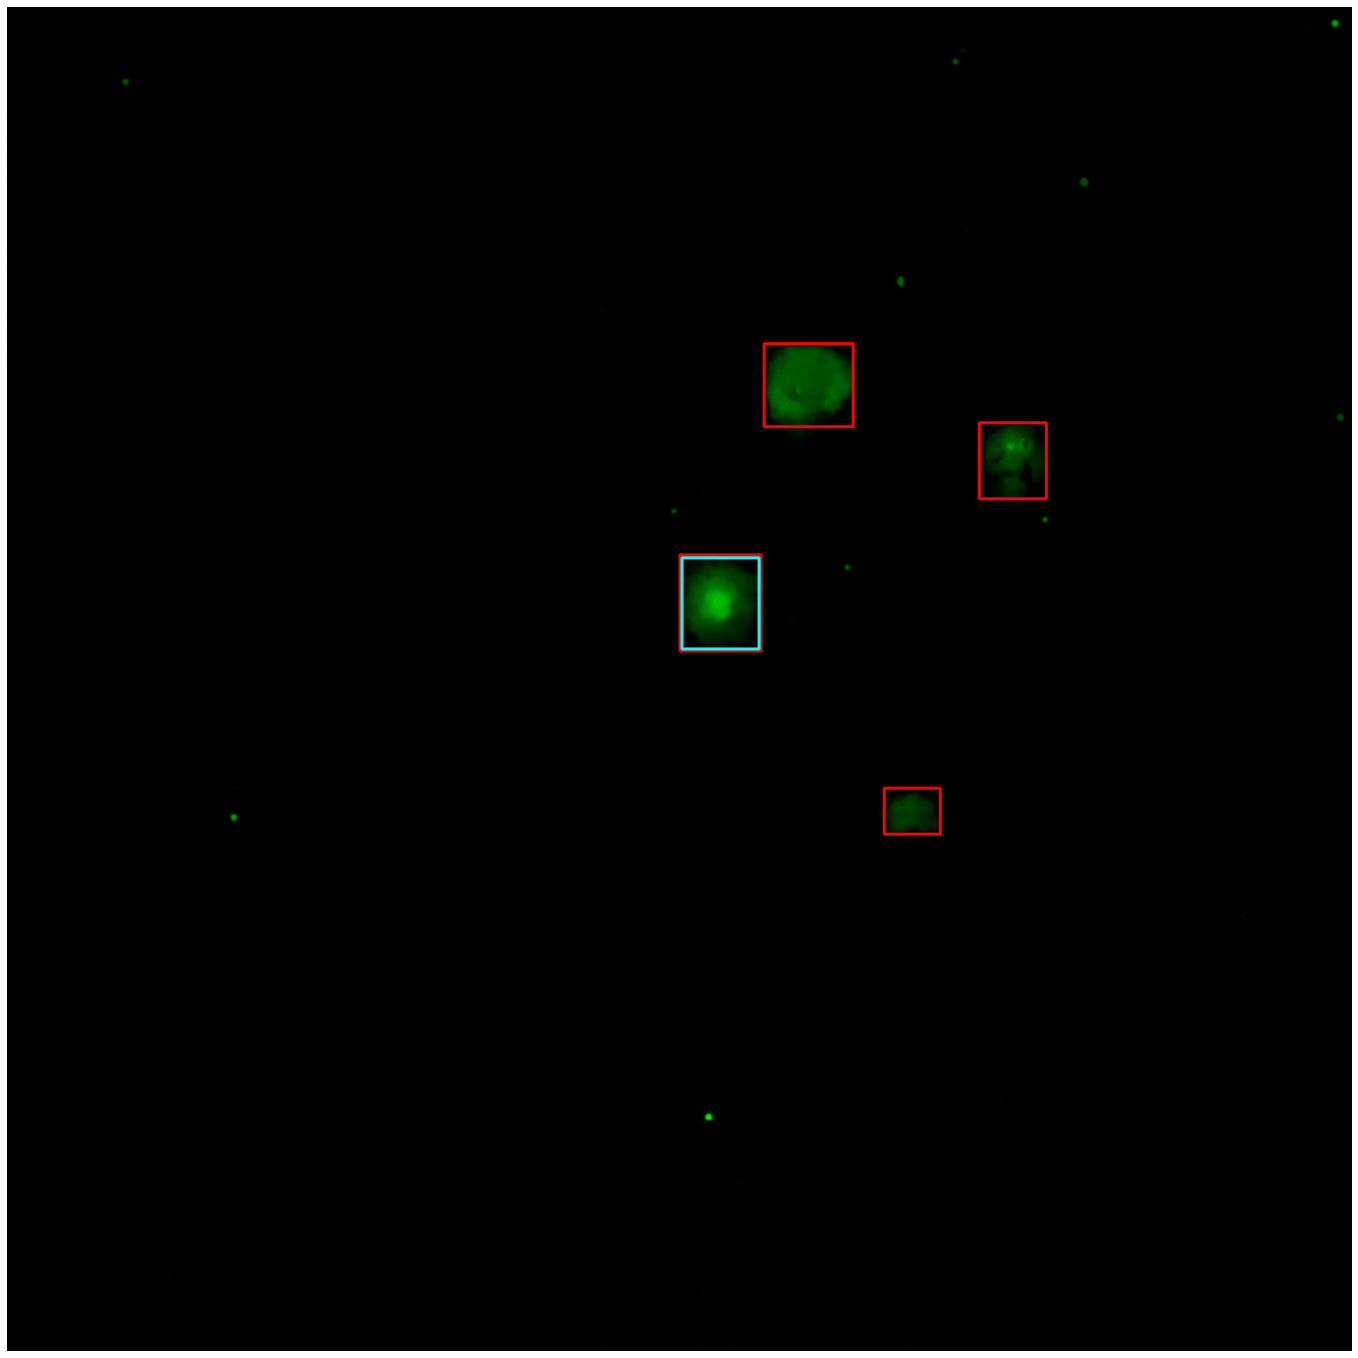

In [27]:
width, height = img.shape[1], img.shape[0]
img = np.ascontiguousarray(img)
fig = plt.figure(frameon=False)
canvas = fig.canvas
dpi = fig.get_dpi()
fig.set_size_inches((width + 1e-8) / dpi, (height + 1e-8) / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = plt.gca()
ax.axis('off')
plt.imshow(img)

In [16]:
df = pd.merge(df_dt, df_gt, on='image_id')

In [30]:
for image_id, df_cur in df.groupby('image_id'):
    df_cur['iou'] = df_cur.apply(lambda x: get_df_iou(x), axis=1)
    df_cur = df_cur[df_cur['iou'] > 0.5]
    if len(df_cur)>0:
        break

In [31]:
df_cur

x1_dt        y1_dt       x2_dt        y2_dt   label_dt  image_id  \
0  793.588867  1193.334595  875.481689  1272.866211  meroclone         0   

   resize    scores  bbox_idx_dt  day  ... clip_y2  batch  bbox_idx  x1_gt  \
0     896  0.998835            0    6  ...    2885      2         0    793   

  y1_gt x2_gt y2_gt   label_gt  bbox_idx_gt       iou  
0  1193   874  1273  meroclone            0  0.969291  

[1 rows x 38 columns]

In [19]:
img = cv2.imread('../data/img_clip_all/' + df_cur['filename_gfp'].tolist()[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [20]:
for i in range(len(df_cur)):
    img = cv2.rectangle(img,
                        (int(df_cur.iloc[i]['x1_gt']), int(df_cur.iloc[i]['y1_gt'])),
                        (int(df_cur.iloc[i]['x2_gt']), int(df_cur.iloc[i]['y2_gt'])),
                        (255,0,0),
                        10)
    img = cv2.rectangle(img,
                        (int(df_cur.iloc[i]['x1_dt']), int(df_cur.iloc[i]['y1_dt'])),
                        (int(df_cur.iloc[i]['x2_dt']), int(df_cur.iloc[i]['y2_dt'])),
                        (0,255,255),
                        10)

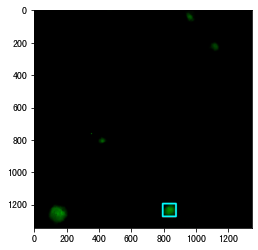

In [21]:
plt.imshow(img)